In [2]:
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib
matplotlib.use('PDF')
import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('bike_met.csv',sep=';')
data.head()

,SENSOR_ID,DIRECTION,SUM,AVGSPEED,RESOLUTION,DAY,MONTH_NO,YEAR,HOUR,MONTH,WIND_MAG,WIND_DIR,TEMP,PPT,RH,WEEKDAY
0,100002,1,10,77.0,HOURLY,1,2,2015,0,Feb,NaN,NaN,NaN,NaN,NaN,Sunday
1,100002,2,19,73.0,HOURLY,1,2,2015,0,Feb,NaN,NaN,NaN,NaN,NaN,Sunday
2,100002,1,10,77.0,HOURLY,1,2,2015,0,Feb,NaN,NaN,NaN,NaN,NaN,Sunday
3,100002,2,19,73.0,HOURLY,1,2,2015,0,Feb,NaN,NaN,NaN,NaN,NaN,Sunday
4,100002,1,9,77.0,HOURLY,1,2,2015,0,Feb,NaN,NaN,NaN,NaN,NaN,Sunday


In [4]:
print("Number of sensor IDs. ",data.SENSOR_ID.unique().shape[0])
print("Number of sensor IDs. ",data.DIRECTION.unique().shape[0])
data_st1=data[data.SENSOR_ID==200009]
data_st2=data[data.SENSOR_ID==300096]

Number of sensor IDs.  101
Number of sensor IDs.  2


In [5]:
data_st1['WIND_MAG'] = data_st1['WIND_MAG'].fillna((data_st1['WIND_MAG'].mean()))
data_st1['TEMP']     = data_st1['TEMP'].fillna((data_st1['TEMP'].mean()))
data_st1['WIND_DIR'] = data_st1['WIND_DIR'].fillna((data_st1['WIND_DIR'].mean()))
data_st1['PPT']      = data_st1['PPT'].fillna((data_st1['PPT'].mean()))
data_st1['RH']       = data_st1['RH'].fillna((data_st1['RH'].mean()))
data_st1['AVGSPEED'] = data_st1['AVGSPEED'].fillna((data_st1['AVGSPEED'].mean()))
data_st1.head()

,SENSOR_ID,DIRECTION,SUM,AVGSPEED,RESOLUTION,DAY,MONTH_NO,YEAR,HOUR,MONTH,WIND_MAG,WIND_DIR,TEMP,PPT,RH,WEEKDAY
386591,200009,1,10,93.860814,HOURLY,1,2,2015,0,Feb,2.700176,142.504558,6.392008,0.097068,76.345867,Sunday
386592,200009,2,14,93.860814,HOURLY,1,2,2015,0,Feb,2.700176,142.504558,6.392008,0.097068,76.345867,Sunday
386593,200009,1,9,93.860814,HOURLY,1,2,2015,0,Feb,2.700176,142.504558,6.392008,0.097068,76.345867,Sunday
386594,200009,2,12,93.860814,HOURLY,1,2,2015,0,Feb,2.700176,142.504558,6.392008,0.097068,76.345867,Sunday
386595,200009,1,9,93.860814,HOURLY,1,2,2015,0,Feb,2.700176,142.504558,6.392008,0.097068,76.345867,Sunday


In [6]:
data_st2['WIND_MAG'] = data_st2['WIND_MAG'].fillna((data_st2['WIND_MAG'].mean()))
data_st2['TEMP']     = data_st2['TEMP'].fillna((data_st2['TEMP'].mean()))
data_st2['WIND_DIR'] = data_st2['WIND_DIR'].fillna((data_st2['WIND_DIR'].mean()))
data_st2['PPT']      = data_st2['PPT'].fillna((data_st2['PPT'].mean()))
data_st2['RH']       = data_st2['RH'].fillna((data_st2['RH'].mean()))
data_st2['AVGSPEED'] = data_st2['AVGSPEED'].fillna((data_st2['AVGSPEED'].mean()))
data_st2.head()
data2=data_st1

In [7]:
y_count=data_st1["SUM"]
y_speed=data_st1["AVGSPEED"]
data_st1=data_st1.drop(['AVGSPEED','SUM','SENSOR_ID','MONTH'],axis=1)

y_count_st2=data_st2["SUM"]
y_speed_st2=data_st2["AVGSPEED"]
data_st2=data_st2.drop(['AVGSPEED','SUM','SENSOR_ID','MONTH'],axis=1)

In [8]:
data_st1['WEEKDAY'] = pd.Categorical(data_st1["WEEKDAY"]).codes
data_st1=pd.get_dummies(data_st1,columns=["MONTH_NO","HOUR","WEEKDAY"],prefix=["month","hour","weekday"])
data_st1=data_st1.drop(["DAY","YEAR","DIRECTION","RESOLUTION"],axis=1)
X=data_st1.values

data_st2['WEEKDAY'] = pd.Categorical(data_st2["WEEKDAY"]).codes
data_st2=pd.get_dummies(data_st2,columns=["MONTH_NO","HOUR","WEEKDAY"],prefix=["month","hour","weekday"])
data_st2=data_st2.drop(["DAY","YEAR","DIRECTION","RESOLUTION"],axis=1)
X_st2=data_st2.values

In [9]:
print("Shape of X ",X.shape)
print("Shape of y_count ",y_count.shape)
print("Shape of X_st2 ",X_st2.shape)
print("Shape of y_count_st2 ",y_count_st2.shape)

Shape of X  (108409, 48)
Shape of y_count  (108409,)
Shape of X_st2  (100546, 48)
Shape of y_count_st2  (100546,)


In [10]:
#Split the data into training and validation test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y_count,test_size=0.2,random_state = 0)

In [11]:
#Multivariabte regression
from sklearn import linear_model
start_time = time.time()
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred_LR_train = regr.predict(X_train)
pred_LR_test = regr.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ",  np.mean((pred_LR_train - y_train) ** 2))
print("Mean squared error: ",  np.mean((pred_LR_test - y_test) ** 2))

Execution time in seconds  0.15700793266296387
Mean squared error:  9482.208359061484
Mean squared error:  9399.280918514447


In [12]:
from sklearn.ensemble import RandomForestRegressor
max_depth = 30
start_time = time.time()
rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
rf.fit(X_train, y_train)
pred_RF_train = rf.predict(X_train)
pred_RF_test = rf.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ",  np.mean((pred_RF_train - y_train) ** 2))
print("Mean squared error: ",  np.mean((pred_RF_test - y_test) ** 2))

Execution time in seconds  6.26406192779541
Mean squared error:  3255.174194393991
Mean squared error:  3734.285322587725


In [13]:
from sklearn.tree import DecisionTreeRegressor
start_time = time.time()
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_DTR_train=dtr.predict(X_train)
pred_DTR_test=dtr.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ",  np.mean((pred_DTR_train - y_train) ** 2))
print("Mean squared error: ",  np.mean((pred_DTR_test - y_test) ** 2))

Execution time in seconds  0.9667251110076904
Mean squared error:  3145.932228201208
Mean squared error:  3749.1940855474413


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
m,input_layer_size=X.shape
hidden_layer_size = input_layer_size   
ANN_classifier = Sequential()
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
ANN_classifier.add(Dense(units = 1, kernel_initializer = 'normal'))
ANN_classifier.compile(loss='mean_squared_error', optimizer='adam')
start_time = time.time()
history=ANN_classifier.fit(X_train, y_train, batch_size = 1000, epochs = 400,verbose=0)
pred_ANN_train = ANN_classifier.predict(X_train)
pred_ANN_test   = ANN_classifier.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ", np.mean((pred_ANN_train - y_train.values.reshape(-1,1)) ** 2))
print("Mean squared error: ", np.mean((pred_ANN_test - y_test.values.reshape(-1,1)) ** 2))

Using TensorFlow backend.


Execution time in seconds  61.26594042778015
Mean squared error:  5684.63571989
Mean squared error:  5630.29836228


In [15]:
y_test = y_test.values.reshape(-1,1)
#for i in range(len(y_val)):
#    print(y_val[i],pred_LR_val[i],pred_RF_val[i],pred_ANN_val[i],pred_DTR_val[i])

In [16]:
def plot_comparision(y_target,y_pred,output):
    plt.plot(y_target,y_pred,'.')
    plt.plot([0,600],[0,600],color='k', linestyle='-')
    plt.xlabel("Observation")
    plt.ylabel("Prediction")
    #plt.title(title)
    plt.savefig(output,bbox_inches='tight')
    plt.show()

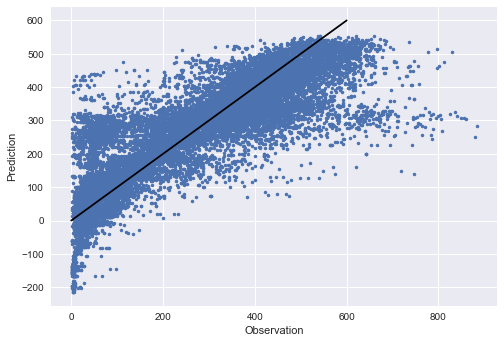

Coefficients: 
 [ 0.72557445]


In [17]:
plot_comparision(y_test,pred_LR_test,'LR_comp.pdf')
regr_result = linear_model.LinearRegression()
regr_result.fit(y_test, pred_LR_test)
print('Coefficients: \n', regr_result.coef_)

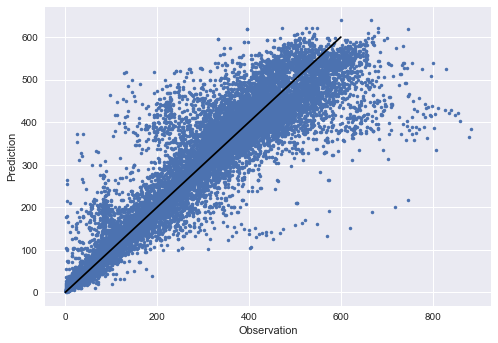

Coefficients: 
 [ 0.89852803]


In [18]:
plot_comparision(y_test,pred_RF_test,'RF_comp.pdf')
regr_result = linear_model.LinearRegression()
regr_result.fit(y_test, pred_RF_test)
print('Coefficients: \n', regr_result.coef_)

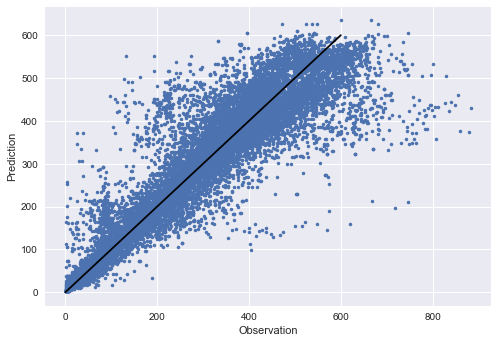

Coefficients: 
 [ 0.90041404]


In [19]:
plot_comparision(y_test,pred_DTR_test,'DTR_comp.pdf')
regr_result = linear_model.LinearRegression()
regr_result.fit(y_test, pred_DTR_test)
print('Coefficients: \n', regr_result.coef_)

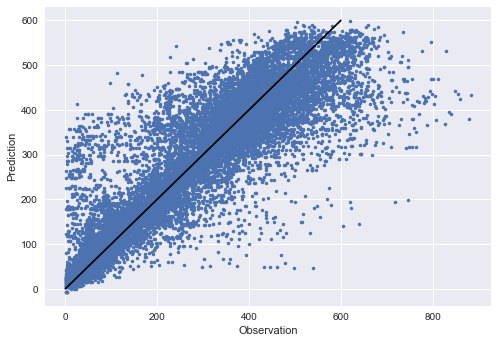

Coefficients: 
 [[ 0.83499131]]


In [20]:
plot_comparision(y_test,pred_ANN_test,'ANN_comp.pdf')
regr_result = linear_model.LinearRegression()
regr_result.fit(y_test, pred_ANN_test)
print('Coefficients: \n', regr_result.coef_)

In [21]:
pred_LR    = regr.predict(X)
pred_RF = rf.predict(X)
pred_DTR   = dtr.predict(X)
pred_ANN   = ANN_classifier.predict(X)
print("Mean squared error: LR  ",  np.mean((pred_LR - y_count) ** 2))
print("Mean squared error: RF  ",  np.mean((pred_RF - y_count) ** 2))
print("Mean squared error: DTR ",  np.mean((pred_DTR - y_count) ** 2))
print("Mean squared error: ANN ",  np.mean((pred_ANN - y_count.values.reshape(-1,1)) ** 2))

Mean squared error: LR   9465.622722046159
Mean squared error: RF   3350.997303928222
Mean squared error: DTR  3266.585712607025
Mean squared error: ANN  5673.7681481


In [22]:
data2['SUM_LR']=pred_LR
data2['SUM_RF']=pred_RF
data2['SUM_DTR']=pred_DTR
data2['SUM_ANN']=pred_ANN

In [23]:
#plt.plot(pred_DTR,data2['SUM'].values,'.')
#plt.show()

In [24]:
def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    plt.figure(figsize=(16,6))
    sns.violinplot(x=key, y=target, data=data_in)#, order=col_order)
    plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    #plt.show()
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()

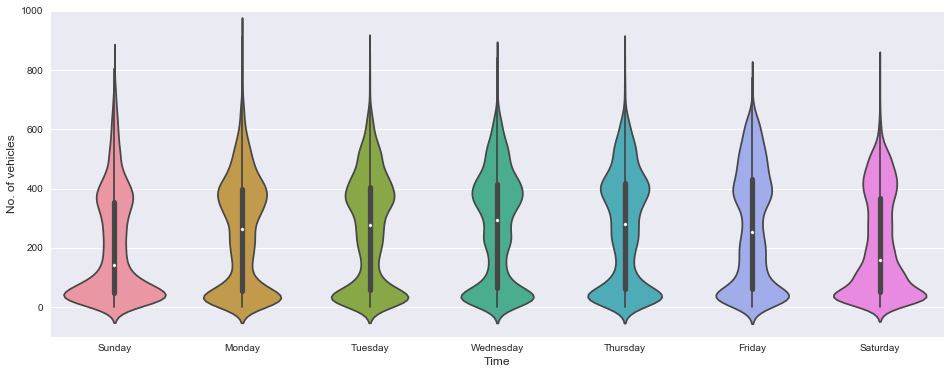

In [25]:
violinplot(data2,'WEEKDAY','SUM','Time','No. of vehicles','','count_vs_hours.pdf')

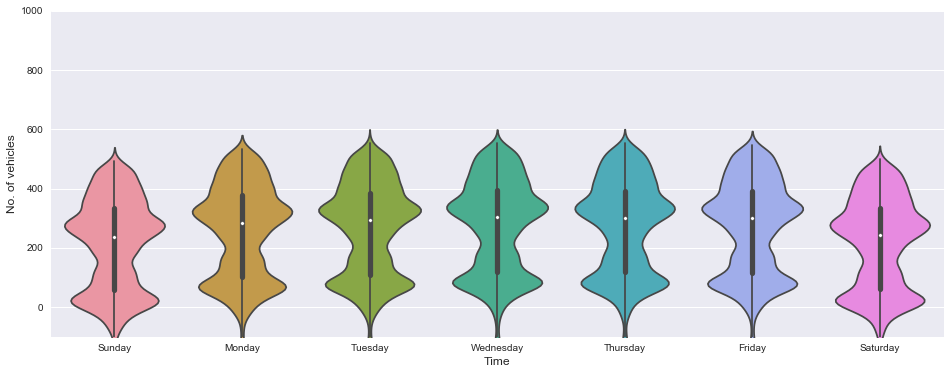

In [26]:
violinplot(data2,'WEEKDAY','SUM_LR','Time','No. of vehicles','','LR_prediction_violin.pdf')

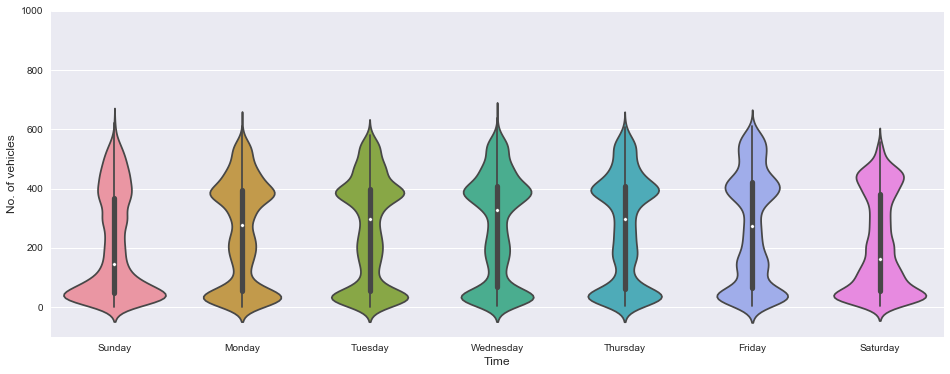

In [27]:
violinplot(data2,'WEEKDAY','SUM_RF','Time','No. of vehicles','','RF_prediction_violin.pdf')

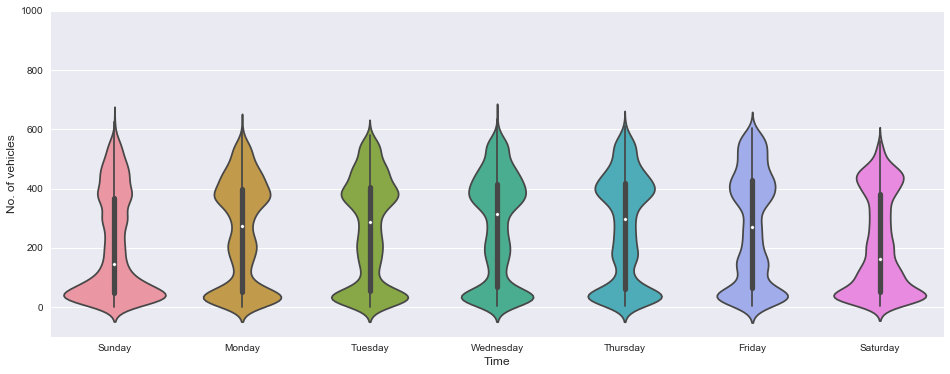

In [29]:
violinplot(data2,'WEEKDAY','SUM_DTR','Time','No. of vehicles','','DTR_prediction_violin.pdf')

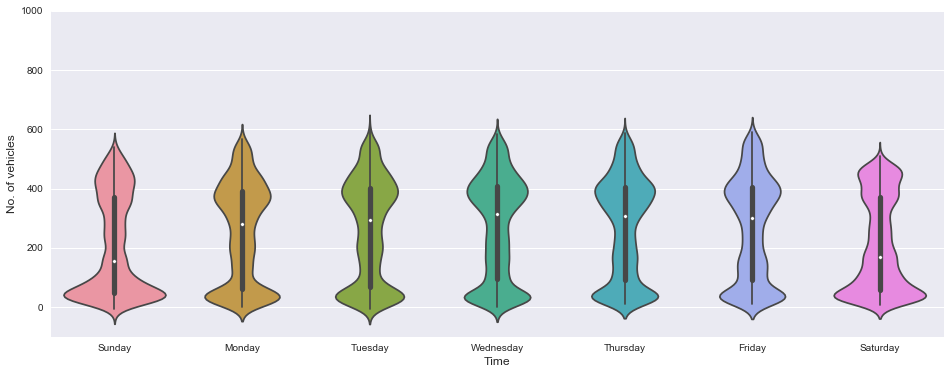

In [30]:
violinplot(data2,'WEEKDAY','SUM_ANN','Time','No. of vehicles','','ANN_prediction_violin.pdf')